In [3]:
import librosa
import librosa.display
import soundfile
import os, glob, pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import IPython.display as ipd  


In [32]:
file_path = 'F:\\01 Code\\01 Projects\\SpeechEmotionRecognitionApp\\ser_model\\speech-emotion-recognition-ravdess-data\\Actor_01\\03-01-01-01-01-01-01.wav'
audio, sr = librosa.load(file_path,sr=4000)
# 44100


In [33]:
ipd.Audio(audio,rate=sr)

In [34]:
audio.shape

(13214,)

In [35]:
print("Sample Rate: ",sr)

Sample Rate:  4000


In [36]:
print("Time Duration Of Each Sample: ", 1/sr)

Time Duration Of Each Sample:  0.00025


In [37]:
print("Total Time Duration of Audio: ", (1/sr)*len(audio))

Total Time Duration of Audio:  3.3035


C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_5740/1988201826.py:3: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ans =  librosa.feature.rms(audio);


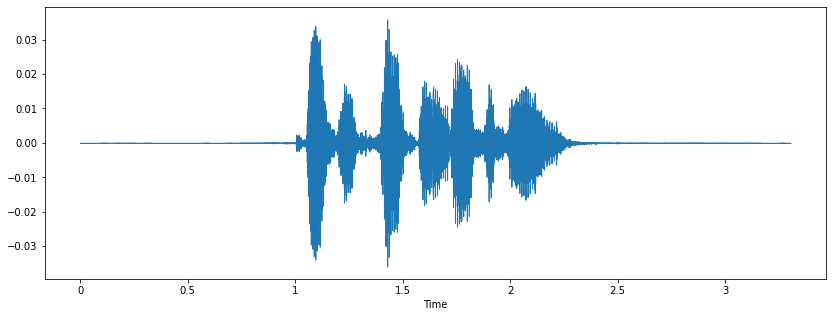

In [38]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(audio, sr=sr)
ans =  librosa.feature.rms(audio);



# 1024
# 512

In [39]:
def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

In [1]:
create_spectrogram(audio,sr,"Some")

NameError: name 'create_spectrogram' is not defined